In [ ]:
import os
import sys
import subprocess
import numpy as np
# import glob
import json
import pandas as pd
import shutil
import librosa.display
# from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import csv
import IPython.display as ipd
import random

In [ ]:
data=pd.read_csv('dataset.csv')
data

,id,status,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,delta2_mfcc5,delta2_mfcc6,delta2_mfcc7,delta2_mfcc8,delta2_mfcc9,delta2_mfcc10,delta2_mfcc11,delta2_mfcc12,delta2_mfcc13,label
0,pbXQf83tO4bPFQ0UZjs9HDE7i7r1,negative,0.411102,0.023910,2476.929264,2069.675166,4881.172498,0.224101,498.603455,42.702919,...,-0.003208,-0.016970,-0.000764,0.001461,0.064153,0.032266,0.000921,0.000014,0.015041,NaN
1,pOZwqBg4NsVYWASmwwhXFq4UlpC2,negative,0.199255,0.004301,884.423230,827.467635,1762.110635,0.049865,193.804794,33.745163,...,-0.003529,-0.061861,-0.058036,-0.014764,0.004945,0.012245,0.007679,-0.018491,0.007048,NaN
2,ose5fZhlJWV7qalryF6Nvp3kY482,negative,0.483609,0.042687,2835.087463,2107.965708,5079.947060,0.413865,468.358490,33.279587,...,0.034844,-0.033192,-0.010810,0.054013,0.049484,0.001452,-0.022664,-0.011843,0.031671,NaN
3,sjRWRFsE64R2o0ZFdGJe8PlWwlM2,negative,0.335329,0.035233,1373.091605,1437.798383,2053.549805,0.089915,498.176666,70.399170,...,0.082945,0.079523,0.152514,0.065099,0.046982,-0.008988,0.030047,0.019502,0.109858,NaN
4,0Ha52POVIxTKEPqI1eGpIoMHUd52,negative,0.409101,0.022619,917.984914,1044.322220,1604.223633,0.065685,360.372650,68.039932,...,-0.054607,-0.062051,-0.061778,-0.041024,0.003355,0.013582,-0.015346,0.001254,0.005171,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,03755.wav,positive,0.293219,0.004427,1936.493365,1193.424877,3157.624824,0.116371,244.221329,24.727655,...,0.030400,0.042544,-0.021442,0.026413,-0.014985,-0.015706,0.023562,-0.015674,0.002381,NaN
1561,03757.wav,positive,0.190535,0.007085,945.474120,756.700735,1778.304704,0.054808,127.551987,23.777485,...,0.016062,0.011735,-0.027769,-0.029950,-0.037356,-0.042085,-0.017889,-0.000496,-0.010228,NaN
1562,03759.wav,positive,0.376341,0.102420,1316.574761,1242.719867,2362.086165,0.073892,504.504333,72.104111,...,0.020067,-0.003001,0.005892,0.062334,0.086477,0.087332,0.009245,-0.027120,0.010352,NaN
1563,03773.wav,positive,0.381045,0.016960,2290.928332,1859.240156,4333.973169,0.158455,455.176025,41.631535,...,-0.014355,-0.005076,0.031268,-0.039827,-0.020755,-0.001488,-0.001537,-0.018496,-0.005387,NaN


#torch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(12)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['status'] = label_encoder.fit_transform(data['status'])
print(label_encoder.classes_)

['negative' 'positive']


In [ ]:
data

,id,status,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,delta2_mfcc5,delta2_mfcc6,delta2_mfcc7,delta2_mfcc8,delta2_mfcc9,delta2_mfcc10,delta2_mfcc11,delta2_mfcc12,delta2_mfcc13,label
0,pbXQf83tO4bPFQ0UZjs9HDE7i7r1,0,0.411102,0.023910,2476.929264,2069.675166,4881.172498,0.224101,498.603455,42.702919,...,-0.003208,-0.016970,-0.000764,0.001461,0.064153,0.032266,0.000921,0.000014,0.015041,NaN
1,pOZwqBg4NsVYWASmwwhXFq4UlpC2,0,0.199255,0.004301,884.423230,827.467635,1762.110635,0.049865,193.804794,33.745163,...,-0.003529,-0.061861,-0.058036,-0.014764,0.004945,0.012245,0.007679,-0.018491,0.007048,NaN
2,ose5fZhlJWV7qalryF6Nvp3kY482,0,0.483609,0.042687,2835.087463,2107.965708,5079.947060,0.413865,468.358490,33.279587,...,0.034844,-0.033192,-0.010810,0.054013,0.049484,0.001452,-0.022664,-0.011843,0.031671,NaN
3,sjRWRFsE64R2o0ZFdGJe8PlWwlM2,0,0.335329,0.035233,1373.091605,1437.798383,2053.549805,0.089915,498.176666,70.399170,...,0.082945,0.079523,0.152514,0.065099,0.046982,-0.008988,0.030047,0.019502,0.109858,NaN
4,0Ha52POVIxTKEPqI1eGpIoMHUd52,0,0.409101,0.022619,917.984914,1044.322220,1604.223633,0.065685,360.372650,68.039932,...,-0.054607,-0.062051,-0.061778,-0.041024,0.003355,0.013582,-0.015346,0.001254,0.005171,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,03755.wav,1,0.293219,0.004427,1936.493365,1193.424877,3157.624824,0.116371,244.221329,24.727655,...,0.030400,0.042544,-0.021442,0.026413,-0.014985,-0.015706,0.023562,-0.015674,0.002381,NaN
1561,03757.wav,1,0.190535,0.007085,945.474120,756.700735,1778.304704,0.054808,127.551987,23.777485,...,0.016062,0.011735,-0.027769,-0.029950,-0.037356,-0.042085,-0.017889,-0.000496,-0.010228,NaN
1562,03759.wav,1,0.376341,0.102420,1316.574761,1242.719867,2362.086165,0.073892,504.504333,72.104111,...,0.020067,-0.003001,0.005892,0.062334,0.086477,0.087332,0.009245,-0.027120,0.010352,NaN
1563,03773.wav,1,0.381045,0.016960,2290.928332,1859.240156,4333.973169,0.158455,455.176025,41.631535,...,-0.014355,-0.005076,0.031268,-0.039827,-0.020755,-0.001488,-0.001537,-0.018496,-0.005387,NaN


In [ ]:
y_data = data[['status']].values
data.drop(['status'], axis=1, inplace=True)
data.drop(['id'], axis=1, inplace=True)
data.drop(['label'], axis=1, inplace=True)
X_data = data.values

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_data)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# X = torch.Tensor(X)
# y = torch.LongTensor(y_data)
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)

In [ ]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 18),
            nn.ReLU(),
            nn.Linear(18, 9),
            nn.ReLU(),
            nn.Linear(9, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        result = output
        with torch.no_grad():
            value = torch.argmax(result, dim=1)
        return result, value

In [ ]:
model = Model(45,2)

In [ ]:
n=100
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[0.1757, 0.2989]])
tensor(0.4746)
tensor(1) tensor(0)


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
print(model)

Model(
  (model): Sequential(
    (0): Linear(in_features=45, out_features=18, bias=True)
    (1): ReLU()
    (2): Linear(in_features=18, out_features=9, bias=True)
    (3): ReLU()
    (4): Linear(in_features=9, out_features=2, bias=True)
  )
)


In [ ]:
#model = Model(36,2) # 입력은 4, 출력은 3종류의 확률
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

n_epochs = 100 # 10000회 학습

for epoch in range(n_epochs):
    y, _ = model(X_train)
    target = y_train.squeeze(dim=-1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 0.7021839022636414
epoch 10th loss: 0.6929146647453308
epoch 20th loss: 0.684603750705719
epoch 30th loss: 0.6758528351783752
epoch 40th loss: 0.664976954460144
epoch 50th loss: 0.6527144312858582
epoch 60th loss: 0.6397473812103271
epoch 70th loss: 0.6259531378746033
epoch 80th loss: 0.6124847531318665
epoch 90th loss: 0.5997564196586609


In [ ]:
n = 10
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[-0.0709,  0.2757]])
tensor(0.2048)
tensor(1) tensor(0)


In [ ]:
model = Model(45,2) # 입력은 4, 출력은 3종류의 확률
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

n_epochs = 100 # 10000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y, _ = model(X_train)
    target = y_train.squeeze(dim=-1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        model.eval()
        y_pred, _ = model(X_test)
        y_test=y_test.squeeze(dim=-1)
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)


epoch 0th training loss: 0.6922239661216736 test loss: 0.6899305582046509
epoch 10th training loss: 0.6868853569030762 test loss: 0.6868181824684143
epoch 20th training loss: 0.6819368004798889 test loss: 0.6835898160934448
epoch 30th training loss: 0.6754128932952881 test loss: 0.6787891387939453
epoch 40th training loss: 0.6668806672096252 test loss: 0.6719594597816467
epoch 50th training loss: 0.6565893888473511 test loss: 0.6648534536361694
epoch 60th training loss: 0.6445901989936829 test loss: 0.6579580903053284
epoch 70th training loss: 0.630884051322937 test loss: 0.6519043445587158
epoch 80th training loss: 0.6156830191612244 test loss: 0.6467412710189819
epoch 90th training loss: 0.5992354154586792 test loss: 0.6445353031158447


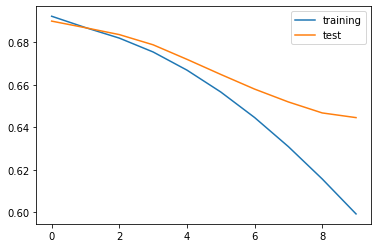

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    _ , y_pred = model(X_test)
    score = accuracy_score(y_test, y_pred)
    print(score)

0.6230031948881789


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.metrics import precision_score, recall_score, f1_score
p = precision_score(y_test, y_pred)
print(p)
r = recall_score(y_test, y_pred)
print(r)
f1 = f1_score(y_test, y_pred)
print(f1)

0.6691176470588235
0.5548780487804879
0.6066666666666666


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.svm import SVC
 
svm_model = SVC(kernel='rbf', C=8, gamma=0.1)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test) 
score = accuracy_score(y_test, y_pred)
print(score)
p = precision_score(y_test, y_pred)
print(p)
r = recall_score(y_test, y_pred)
print(r)
f1 = f1_score(y_test, y_pred)
print(f1)

0.610223642172524
0.6153846153846154
0.6829268292682927
0.6473988439306357


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

model = RandomForestClassifier(n_estimators=20, max_depth=3,random_state=0)
model.fit(X_train,y_train)


y_pred = model_rf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)
p = precision_score(y_test, y_pred)
print(p)
r = recall_score(y_test, y_pred)
print(r)
f1 = f1_score(y_test, y_pred)
print(f1)

0.670926517571885
0.6804733727810651
0.7012195121951219
0.6906906906906907


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

decision_tree = DecisionTreeClassifier(random_state=32) 
decision_tree.fit(X_train, y_train) 
y_pred = decision_tree.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)
p = precision_score(y_test, y_pred)
print(p)
r = recall_score(y_test, y_pred)
print(r)
f1 = f1_score(y_test, y_pred)
print(f1)

0.5143769968051118
0.5365853658536586
0.5365853658536586
0.5365853658536586


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(score)
p = precision_score(y_test, y_pred)
print(p)
r = recall_score(y_test, y_pred)
print(r)
f1 = f1_score(y_test, y_pred)
print(f1)

0.5143769968051118
0.5476190476190477
0.42073170731707316
0.4758620689655173


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix



logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

score = accuracy_score(y_test, y_pred)
print(score)
p = precision_score(y_test, y_pred)
print(p)
r = recall_score(y_test, y_pred)
print(r)
f1 = f1_score(y_test, y_pred)
print(f1)

              precision    recall  f1-score   support

           0       0.61      0.67      0.64       149
           1       0.67      0.60      0.63       164

    accuracy                           0.64       313
   macro avg       0.64      0.64      0.64       313
weighted avg       0.64      0.64      0.64       313

0.6357827476038339
0.668918918918919
0.6036585365853658
0.6346153846153846


In [ ]:
torch.save(model, f'./model.pt')

In [ ]:
pwd

'/content/csvs'